In [1]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
img = cv2.imread('./test_images/virat.jpg') 

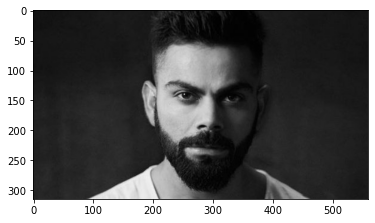

In [3]:
plt.imshow(img) 

In [4]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(315, 560)

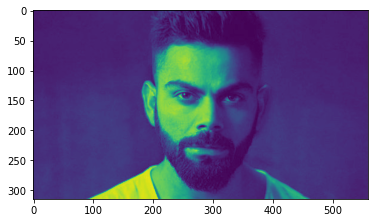

In [5]:
plt.imshow(gray) 

In [6]:
face_cascade =cv2.CascadeClassifier('./opencv/haarcascade/haarcascade_frontalface_default.xml')
eye_cascade =cv2.CascadeClassifier('./opencv/haarcascade/haarcascade_eye.xml')
faces = face_cascade.detectMultiScale(gray,1.3,5)
faces 

array([[184,  57, 224, 224]])

In [7]:
(x,y,w,h)=faces[0]
x,y,w,h

(184, 57, 224, 224)

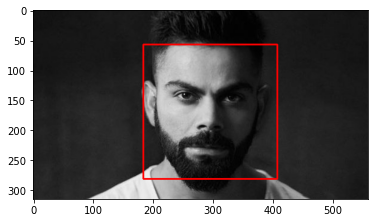

In [8]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2) 
plt.imshow(face_img) 

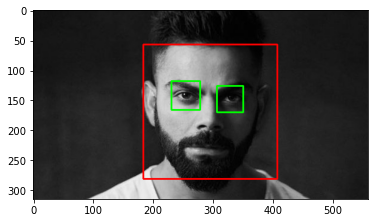

In [9]:
cv2.destroyAllWindows() 
for(x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = face_img[y:y+h,x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for(ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure() 
plt.imshow(face_img,cmap='gray')
plt.show()

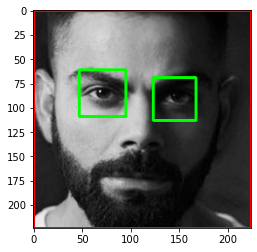

In [10]:
plt.imshow(roi_color,cmap='gray') 

In [11]:
def cropped_images(image_path):
    img = cv2.imread(image_path) 
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    face_cascade =cv2.CascadeClassifier('./opencv/haarcascade/haarcascade_frontalface_default.xml')
    eye_cascade =cv2.CascadeClassifier('./opencv/haarcascade/haarcascade_eye.xml')
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    for(x,y,w,h) in faces:
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = img[y:y+h,x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if(len(eyes))>=2:
            return roi_color   

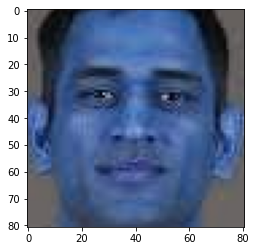

In [12]:
cropped_img = cropped_images('./test_images/dhoni.jpg')
plt.imshow(cropped_img) 

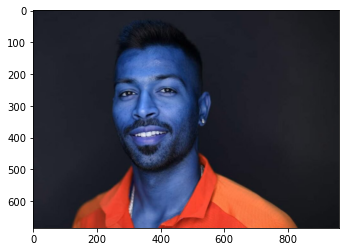

In [13]:
org_img = cv2.imread('./test_images/pandya.jpg')  
plt.imshow(org_img)

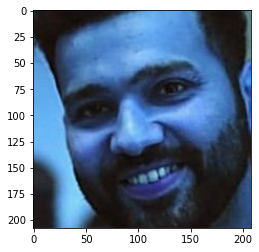

In [14]:
cropped_img = cropped_images("./test_images/rohit.jpg")
plt.imshow(cropped_img)

In [15]:
path_to_data = './dataset/'
path_to_cr_data = './dataset/cropped/' 

In [16]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path) 

In [17]:
img_dirs

['./dataset/hardik_pandya',
 './dataset/ms_dhoni',
 './dataset/rohit_sharma',
 './dataset/virat_kohli']

In [18]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [19]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = cropped_images(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".jpg"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1 

hardik_pandya
Generating cropped images in folder:  ./dataset/cropped/hardik_pandya
ms_dhoni
Generating cropped images in folder:  ./dataset/cropped/ms_dhoni
rohit_sharma
Generating cropped images in folder:  ./dataset/cropped/rohit_sharma
virat_kohli
Generating cropped images in folder:  ./dataset/cropped/virat_kohli


In [21]:
import pywt
import numpy as np
import cv2 

In [22]:
def w2d(img,mode='haar',level=1):
    imArray=img
    #convert gray scale
    imArray=cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    #convert to float
    imArray=np.float32(imArray)
    imArray /= 255;
    #compute coefficient
    coeff=pywt.wavedec2(imArray,mode,level=level)
    #process coeff
    coeff_h=list(coeff)
    coeff_h[0] *= 0;
    #reconstruction
    imArray_h =pywt.waverec2(coeff_h,mode);
    imArray_h *= 255;
    imArray_h = np.uint8(imArray_h)
    return imArray_h
    

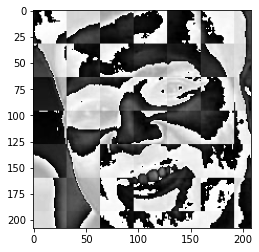

In [23]:
im_h=w2d(cropped_img,'db1',5)
plt.imshow(im_h,cmap='gray')  

In [24]:
celebrity_file_names_dict 

{'hardik_pandya': ['./dataset/cropped/hardik_pandya/hardik_pandya1.jpg',
  './dataset/cropped/hardik_pandya/hardik_pandya2.jpg',
  './dataset/cropped/hardik_pandya/hardik_pandya3.jpg',
  './dataset/cropped/hardik_pandya/hardik_pandya4.jpg',
  './dataset/cropped/hardik_pandya/hardik_pandya5.jpg',
  './dataset/cropped/hardik_pandya/hardik_pandya6.jpg',
  './dataset/cropped/hardik_pandya/hardik_pandya7.jpg',
  './dataset/cropped/hardik_pandya/hardik_pandya8.jpg',
  './dataset/cropped/hardik_pandya/hardik_pandya9.jpg',
  './dataset/cropped/hardik_pandya/hardik_pandya10.jpg',
  './dataset/cropped/hardik_pandya/hardik_pandya11.jpg',
  './dataset/cropped/hardik_pandya/hardik_pandya12.jpg',
  './dataset/cropped/hardik_pandya/hardik_pandya13.jpg'],
 'ms_dhoni': ['./dataset/cropped/ms_dhoni/ms_dhoni1.jpg',
  './dataset/cropped/ms_dhoni/ms_dhoni2.jpg',
  './dataset/cropped/ms_dhoni/ms_dhoni3.jpg',
  './dataset/cropped/ms_dhoni/ms_dhoni4.jpg',
  './dataset/cropped/ms_dhoni/ms_dhoni5.jpg',
  './dat

In [25]:
class_dict = {}
cnt=0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name]=cnt
    cnt += 1
class_dict

{'hardik_pandya': 0, 'ms_dhoni': 1, 'rohit_sharma': 2, 'virat_kohli': 3}

In [26]:
x=[]
y=[]
for celebrity_name,training_files in celebrity_file_names_dict.items():
    for training_images in training_files:
        img=cv2.imread(training_images)
        if img is None:
            continue
        scale_raw_img = cv2.resize(img,(32,32))
        img_haar=w2d(img,'db1',5)
        scale_img_haar = cv2.resize(img_haar,(32,32))
        combined_img = np.vstack((scale_raw_img.reshape(32*32*3,1),scale_img_haar.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[celebrity_name]) 

In [27]:
len(x[0])  # 32*32*3 + 32*32 = 4096

4096

In [28]:
x[0]

array([[254],
       [254],
       [254],
       ...,
       [241],
       [217],
       [228]], dtype=uint8)

In [29]:
x=np.array(x).reshape(len(x),4096).astype(float)
x.shape 

(94, 4096)

In [30]:
x[0]

array([254., 254., 254., ..., 241., 217., 228.])

In [31]:
#Train my model 

In [32]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [68]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'linear', C = 10))])
pipe.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(C=10, kernel='linear'))])

In [69]:
pipe.score(x_test,y_test)

0.625

In [71]:
len(x_test) 

24

In [72]:
print(classification_report(y_test,pipe.predict(x_test))) 

              precision    recall  f1-score   support

           0       0.25      0.25      0.25         4
           1       0.67      0.86      0.75         7
           2       0.60      0.43      0.50         7
           3       0.83      0.83      0.83         6

    accuracy                           0.62        24
   macro avg       0.59      0.59      0.58        24
weighted avg       0.62      0.62      0.61        24



In [73]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [74]:
clf=DecisionTreeClassifier(random_state=0)

In [75]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,100]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,100]
        }
   
    }
}

In [76]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.714286,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.600000,{'randomforestclassifier__n_estimators': 100}
2,logistic_regression,0.657143,{'logisticregression__C': 1}


In [60]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [78]:
best_clf=best_estimators['svm'].score(x_test,y_test)

In [66]:
best_estimators['random_forest'].score(x_test,y_test)

0.625

In [64]:
best_estimators['logistic_regression'].score(x_test,y_test)

0.5833333333333334

In [80]:
best_clf=best_estimators['svm']
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(x_test))
cm

array([[1, 2, 0, 1],
       [0, 6, 1, 0],
       [3, 1, 3, 0],
       [0, 0, 1, 5]], dtype=int64)

Text(69.0, 0.5, 'Truth')

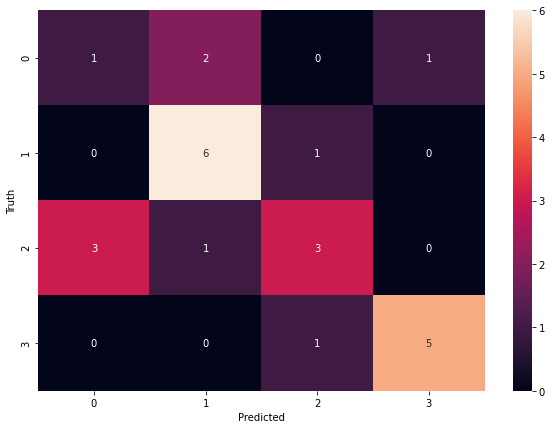

In [81]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [82]:
class_dict 

{'hardik_pandya': 0, 'ms_dhoni': 1, 'rohit_sharma': 2, 'virat_kohli': 3}

In [83]:
import joblib 

joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [84]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))